<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />

# CNN implementation on MNIST dataset using Keras.<br>
<img src = "https://raw.githubusercontent.com/insaid2018/DeepLearning/master/images/mnist.gif">

### Table of Content
- 1. [Introduction](#section1)<br>
- 2. [Data Pre Processing](#section2)<br>
    - 2.1 [Load Data](#section201)<br>
    - 2.2 [Check shape, data type](#section202)<br>
    - 2.3 [Extract xtrain, ytrain](#section203)<br>
    - 2.4 [Mean and std of classes](#section204)<br>
    - 2.5 [Check nulls and missing values](#section205)<br>
    - 2.6 [Visualization](#section206)<br>
    - 2.7 [Normalization](#section207)<br>
    - 2.8 [Reshape](#section208)<br>
    - 2.9 [One Hot Encoding of label](#section209)<br>
    - 2.10 [Split training and validation sets](#section210)<br>
- 3. [Convolutional Neural Network](#section3)<br>
    - 3.1 [Define model architecture](#section301)<br>
    - 3.2 [Compile the model](#section302)<br>
    - 3.3 [Set other parameters](#section303)<br>
    - 3.4 [Fit model](#section304)<br>
    - 3.5 [Plot loss and accuracy](#section305)<br>
    - 3.6 [Plot confusion matrix](#section306)<br>
    - 3.7 [Plot errors](#section307)<br>

<a id=section1></a>
### Introduction
> MNIST digit recognition is the Computer Vision Hello World


The Digit recognizer dataset is a very suitable set of images for CNN, considering the __image size is homogenous__ across all images(not common in real-world problems), that the size is small (28*28) so no resizing required.
They are in greyscale and also in csv which can be easily read into dataframe.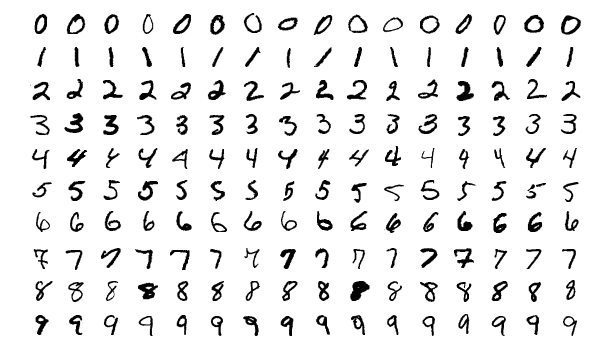

The notebook consists of __3 main parts__:
- __Data preparation__: 
    - Even if the data is already quite clean as mentioned before, it still needs some preparation and pre-processing in order to be in appropriate format for performing CNN. It includes
        - Data seperation
        - Reshaping
        - Visualization<br><br>
- __CNN__: 
    - After NN is defined, 
        - The Convolutional step gets added up, 
        - NN parameters initialized and 
        - The model is trained.<br><br>
- __Evaluation__: 
    - Once model is trained, 
        - Evaluate the model performance by 
        - Seeing the progress of the loss and
        - Extract some conclusions.

In [1]:
### Import libraries
import numpy as np
import pandas as pd

<a id=section2></a>
### 2. Data Pre processing

<a id=section201></a>
#### 2.1 Load Data
- __Train__:
    - Used to __train__ the CNN
    - __Image data and corresponding class__ is provided
    - CNN __learns the weights__ to create the mapping from the image data to their corresponding class.
    
- Test:
    - Used to __test__ the CNN
    - Only __image data__ is provided    

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

<a id=section201></a>
#### 2.2 Check shape, data type

In [3]:
print(train.shape)
ntrain = train.shape[0]

print(test.shape)
ntest = test.shape[0]

train.head()

(42000, 785)
(28000, 784)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Observation
- __Train__:
    - Contains data from __42K images__.
    - Data from each image is stretched out in 1D with __28*28 = 784 pixels__
    - First columns is the __label/class__ it belongs, the digit it represnts
    
- __Test__:
    - Contains data from __28k images__.
    - Data shall be fed to the CNN so that it's new data, that the CNN has never seen before.
    - There is __no label information__, that is the goal of the notebook, predicting lables as well as possible.


In [4]:
# Check data type
print(train.dtypes[:5])       # all int64, other wise do train =  train.astype('int64')
print(test.dtypes[:5])        # all int64, other wise do test =  test.astype('int64')

label     int64
pixel0    int64
pixel1    int64
pixel2    int64
pixel3    int64
dtype: object
pixel0    int64
pixel1    int64
pixel2    int64
pixel3    int64
pixel4    int64
dtype: object


<a id=section203></a>
#### 2.3 Extract xtrain, ytrain

The CNN will be fed xtrain and it will learn the weights to map xtrain to ytrain.

In [5]:
# array containing labels of each image
ytrain = train['label']
print("Shape of ytrain: ", ytrain.shape)

# dataframe containing all pixels ( the label column is dropped)
xtrain = train.drop("label", axis=1)

# the images are in square from, so dim*dim =784
from math import sqrt
dim = int(sqrt(xtrain.shape[1]))
print("The images are {}x{} square.".format(dim, dim))

print("Shape of xtrain: ", xtrain.shape)

Shape of ytrain:  (42000,)
The images are 28x28 square.
Shape of xtrain:  (42000, 784)


In [6]:
ytrain.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

<a id=section204></a>
#### 2.4 Mean and std of the classes

In [7]:
import seaborn as sns
sns.set(style='white', context='notebook', palette='deep')

#plot how many images are there in each class
sns.countplot(ytrain)

print(ytrain.shape)
print(type(ytrain))

#array with each class and its number of images
vals_class = ytrain.value_counts()
print(vals_class)

#mean and std
cls_mean = np.mean(vals_class)
cls_std = np.std(vals_class, ddof=1)

print("The mean amount of elements per class is", cls_mean)
print("The standard deviation on the element per class distribution is", cls_std)


# 68% - 95% - 99% rule, the 68% of the data should be cls_std away from the mean and so on
if cls_std > cls_mean * (0.6827 / 2):
    print("The standard deviation is high")

(42000,)
<class 'pandas.core.series.Series'>
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64
The mean amount of elements per class is 4200.0
The standard deviation on the element per class distribution is 237.08929400825616


**Observation**
- Shape of __xtrain__ is: (42000, 784)
- Shape of __ytrain__ is: (42000, )
- Shape of __test__ is: (28000, 784)

- __Number of classes = 10__, the distribution of the pictures per class has a __mean of 4200 images__ and a __std of 237 images__.
- The digit 1 has the __most representation (4684 images)__ and the digit 5 __the least (3795 images)__. This data can be seen by printing __vals_class__.
- This corresponds to a __small standard deviation (5.64%)__ so there is __no class imbalance__.

<a id=section205></a>
#### 2.5 Check nulls and missing value

```
df.isnull()
```
Returns a boolean df with true if value is NaN and false otherwise.

```
df.isnull().any()
```
Returns a df with 1 col and n rows where each row says if there is a NaN value present in that col.

```
df.isnull().any().any()
```
Returns a bool with True if any of the df.isnull().any() rows is True

In [8]:
def check_nan(df):
    print(df.isnull().any().describe())
    print("There are missing values" if df.isnull().any().any() else "There are no missing values")

    if df.isnull().any().any():
        print(df.isnull().sum(axis=0))
        
    print()
        
check_nan(xtrain)
check_nan(test)

count       784
unique        1
top       False
freq        784
dtype: object
There are no missing values

count       784
unique        1
top       False
freq        784
dtype: object
There are no missing values



<a id=section206></a>
#### 2.6 Visualization

1. The first nine images in the dataset (which are not ordered by digit) are plotted, just for visualization. 
2. There is only one color channel __(grayscale)__ and moreover the pixels are __binarized__, meaning that they are either __black (0)__ or __white (255)__. 
3. This makes the classification problem __easier__. 
4. Imagine that the CNN received __colored digits__, either solid, gradient, or digits with __many colors__. 
5. Probably __some part of the neural network__ would focus on learning to tell the digits apart by __looking at the colors__, when the __actual difference__ between the digits is in their shape.

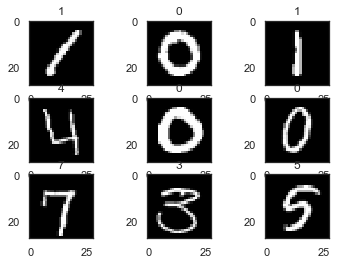

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# convert train dataset to (num_images, img_rows, img_cols) format in order to plot it
xtrain_vis = xtrain.values.reshape(ntrain, dim, dim)

# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html
# subplot(2,3,3) = subplot(233)
# a grid of 3x3 is created, then plots are inserted in some of these slots
for i in range(0,9): # how many imgs will show from the 3x3 grid
    plt.subplot(330 + (i+1)) # open next subplot
    plt.imshow(xtrain_vis[i], cmap=plt.get_cmap('gray'))
    plt.title(ytrain[i]);

<a id=section207></a>
#### 2.7 Normalization
- Pixels are represented in the range [0-255].
- The __NN converges faster__ with smaller values, in the range [0-1] so they are normalized to this range.

In [10]:
xtrain = xtrain / 255.0                                                   # Normalize the data
test = test / 255.0

<a id=section208></a>
#### 2.8 Reshape

In [11]:
def df_reshape(df):                                                       # reshape of image data to (nimg, img_rows, img_cols, 1)
    print("Previous shape, pixels are in 1D vector:", df.shape)
    df = df.values.reshape(-1, dim, dim, 1)                               # -1 means the dimension doesn't change, so 42000 in the case of xtrain and 28000 in the case of test
    print("After reshape, pixels are a 28x28x1 3D matrix:", df.shape)
    return df

xtrain = df_reshape(xtrain)                                               # numpy.ndarray type
test = df_reshape(test)                                                   # numpy.ndarray type

Previous shape, pixels are in 1D vector: (42000, 784)
After reshape, pixels are a 28x28x1 3D matrix: (42000, 28, 28, 1)
Previous shape, pixels are in 1D vector: (28000, 784)
After reshape, pixels are a 28x28x1 3D matrix: (28000, 28, 28, 1)


**Observation**<br><br>
In __real world problems__, the dimensions of images could diverge from this particular 28x28x1 set in two ways:

- Images are usually __much bigger__

- In MNIST dataset there is no such problem since the dimensions are already __small__.

- Images __don't__ usually have the __same__ dimensions

- Different dimension images are a problem since dense layers at the end of the __CNN have a fixed number of neurons__, which cannot be dynamically changed. 
- The layer expects __fixed image dimensions__, which means all images must be __resized__ to the same dimensions before training. 

- There is another option, namely, using a __FCN (fully convoluted network)__ which consits solely of convolutional layers and a very big pooling in the end, so each image can be of any size, but this architecture isn't as popular as the CNN + FC (fully connected) layers.

There are __various methods__ to make images have the same dimensions:

- __Resize__ to a fixed dimension
- __Add padding__ to some images and resize


<a id=section209></a>
#### 2.9 One Hot Encoding of label

In [12]:
from keras.utils.np_utils import to_categorical

print(type(ytrain))
# number of classes, in this case 10
nclasses = ytrain.max() - ytrain.min() + 1

print("Shape of ytrain before: ", ytrain.shape) # (42000,)

ytrain = to_categorical(ytrain, num_classes = nclasses)

print("Shape of ytrain after: ", ytrain.shape) # (42000, 10), also numpy.ndarray type
print(type(ytrain))

/home/shubham/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


<class 'pandas.core.series.Series'>
Shape of ytrain before:  (42000,)
Shape of ytrain after:  (42000, 10)
<class 'numpy.ndarray'>


<a id=section210></a>
#### 2.10 Splitting training and validation datasets

In [13]:
from sklearn.model_selection import train_test_split

# fix random seed for reproducibility
seed = 2
np.random.seed(seed)

# percentage of xtrain which will be xval
split_pct = 0.1

# Split the train and the validation set
xtrain, xval, ytrain, yval = train_test_split(xtrain,
                                              ytrain, 
                                              test_size=split_pct,
                                              random_state=seed,
                                              shuffle=True,
                                              stratify=ytrain
                                             )

print(xtrain.shape, ytrain.shape, xval.shape, yval.shape)

(37800, 28, 28, 1) (37800, 10) (4200, 28, 28, 1) (4200, 10)


**Observation**
The available data is now divided as follows:

- __Train data__     : Images (xtrain) and labels (ytrain), __90% of the available data__
- __Validation data__: Images (xval) and labels (yval), __10% of the available data__

<a id=section3></a>
## 3. CNN
In this section the CNN is defined, including 
- Architecture, 
- Optimizers, 
- Metrics, 
- Learning rate reductions, 
- Data augmentation <br>


Then it is compiled and fit to the training set.

In [14]:
from keras import backend as K

# for the architecture
from keras.models import Sequential
from keras.layers import Dense, Dropout, Lambda, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPool2D, AvgPool2D

# optimizer, data generator and learning rate reductor
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


<a id=section301></a>
### 3.1 Define Model Architecture

- __Conv2D__<br><br>

    - __filters__: 
        - Usually on the first convolutional layers there are __less filters, and more deeper down the CNN__. 
        - A __power of 2__ is set, and in this case 16 offered poorer performance big CNN was not required for digit recognition.<br><br>

    - __kernel_size__: 
        - The filter size, usually __(3,3) or (5,5)__ is set. 
        - Ii is advised setting one, building the architecture and changing it to __see if it affects the performance__ though it usually doesn't.<br><br>

    - __padding__: Two options

        - _valid padding_: __No__ padding, the image __shrinks__ after convolution.
        - _same padding_ : Padding of __2__, the image __doesn't shrink__ after convolution.<br><br>
    - __activation__:
        - ReLU is represented mathematically by __max(0,X)__ and offers __good performance in CNNs__.<br><br>

- __MaxPool2D__: <br><br>
    - The goal is to __reduce variance/overfitting__ and __reduce computational complexity__ since it makes the image smaller. two pooling options

        - MaxPool2D: Extracts the most important features like __edges__
        - AvgPool2D: Extracts __smooth features__<br><br>

__Conclusion__ is that for binarized images, with noticeable edge differences, __MaxPool performs better__.<br><br>

- __Dropout__:<br><br>

     - It's a useful tool to __reduce overfitting__. 
     - The net becomes __less sensitive__ to the specific weights of __neurons__ and is more capable of better generalization and __less likely to overfit__ to the train data. 
     - The __optimal dropout value in Conv layers is 0.2__, and if you want to implement it in the __dense layers, its optimal value is 0.5__.

In [15]:
model = Sequential()

dim = 28
nclasses = 10

model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(dim,dim,1)))
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu',))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(nclasses, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        102464    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
__________

<a id=section302></a>
#### 3.2 Compile the model

In [17]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

<a id=section303></a>
#### 3.3 Learning rate annealer

- This is a useful tool which __reduces the learning rate__ when there is a __plateau on a certain value__.
- In this case the monitoring value is __val_acc__. 
- When there is no change in val_acc in __3 epochs (patience)__, the learning rate is multiplied by __0.5 (factor)__. 
- If the learning rate has the __value of min_lr, it stops decreasing__.

In [18]:
lr_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                 patience=3, 
                                 verbose=1, 
                                 factor=0.5, 
                                 min_lr=0.00001)

<a id=section304></a>
#### 3.4 Data Augmentation
- Data augmentation is a technique used to __artificially make the training set bigger__.
- There are a number of options for this, the __most common ones include__ :
    - Rotating images, 
    - Zooming in a small range and 
    - Shifting images horizontally and vertically.

In [19]:
datagen = ImageDataGenerator(
          featurewise_center=False,            # set input mean to 0 over the dataset
          samplewise_center=False,             # set each sample mean to 0
          featurewise_std_normalization=False, # divide inputs by std of the dataset
          samplewise_std_normalization=False,  # divide each input by its std
          zca_whitening=False,                 # apply ZCA whitening
          rotation_range=30,                   # randomly rotate images in the range (degrees, 0 to 180)
          zoom_range = 0.1,                    # Randomly zoom image 
          width_shift_range=0.1,               # randomly shift images horizontally (fraction of total width)
          height_shift_range=0.1,              # randomly shift images vertically (fraction of total height)
          horizontal_flip=False,               # randomly flip images
          vertical_flip=False)                 # randomly flip images

datagen.fit(xtrain)

#### Epochs and batch size
- __Epochs__: 
    - Based on experiments, the loss and accuracy get into a plateau at __around the 10th epoch__, so we should usually __set it to 15__.
- __Batch_size__: 
    - It is recommended to try __changing it and check the change in the loss and accuracy__.
    - In this case a batch_size of 16 turned out to be disastrous and the __best case__ occurred when it was __set to 64__.

In [20]:
epochs = 15
batch_size = 64

<a id=section304></a>
### 3.4 Fit the model

In [21]:
history = model.fit_generator(datagen.flow(xtrain,ytrain, batch_size=batch_size),
                              epochs=epochs, 
                              validation_data=(xval,yval),
                              verbose=1, 
                              steps_per_epoch=xtrain.shape[0] // batch_size, 
                              callbacks=[lr_reduction])

Instructions for updating:
Use tf.cast instead.
Epoch 1/15
590/590 [==============================] - 253s 428ms/step - loss: 0.3611 - acc: 0.8835 - val_loss: 0.0686 - val_acc: 0.9781
Epoch 2/15
590/590 [==============================] - 227s 385ms/step - loss: 0.1097 - acc: 0.9673 - val_loss: 0.0324 - val_acc: 0.9874
Epoch 3/15
590/590 [==============================] - 227s 385ms/step - loss: 0.0851 - acc: 0.9743 - val_loss: 0.0408 - val_acc: 0.9869
Epoch 4/15
590/590 [==============================] - 222s 376ms/step - loss: 0.0715 - acc: 0.9786 - val_loss: 0.0321 - val_acc: 0.9900
Epoch 5/15
590/590 [==============================] - 221s 374ms/step - loss: 0.0625 - acc: 0.9807 - val_loss: 0.0313 - val_acc: 0.9914
Epoch 6/15
590/590 [==============================] - 220s 373ms/step - loss: 0.0569 - acc: 0.9823 - val_loss: 0.0355 - val_acc: 0.9905
Epoch 7/15
590/590 [==============================] - 220s 373ms/step - loss: 0.0544 - acc: 0.9837 - val_loss: 0.0324 - val_acc: 0.9902


<a id=section305></a>
#### 3.5 Plot loss and accuracy

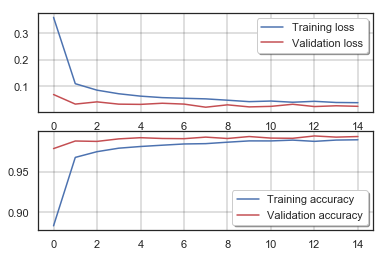

In [22]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss",axes =ax[0])
ax[0].grid(color='black', linestyle='-', linewidth=0.25)
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
ax[1].grid(color='black', linestyle='-', linewidth=0.25)
legend = ax[1].legend(loc='best', shadow=True)

<a id=section306></a>
#### 3.6 Plotting confusion matrix

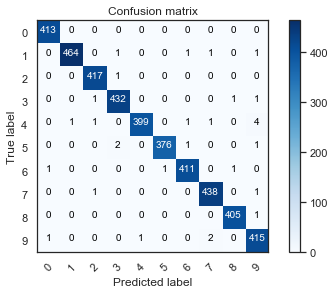

In [23]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
ypred_onehot = model.predict(xval)
# Convert predictions classes from one hot vectors to labels: [0 0 1 0 0 ...] --> 2
ypred = np.argmax(ypred_onehot,axis=1)
# Convert validation observations from one hot vectors to labels
ytrue = np.argmax(yval,axis=1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(ytrue, ypred)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes=range(nclasses))

<a id=section307></a>
#### 3.7 Plot errors

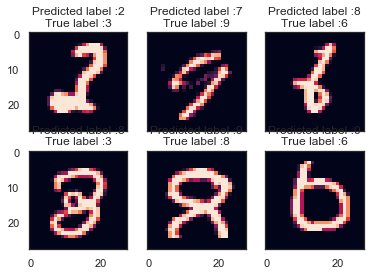

In [24]:
errors = (ypred - ytrue != 0) # array of bools with true when there is an error or false when the image is cor

ypred_er = ypred_onehot[errors]
ypred_classes_er = ypred[errors]
ytrue_er = ytrue[errors]
xval_er = xval[errors]

def display_errors(errors_index, img_errors, pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows, ncols, sharex=True, sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1
            
# Probabilities of the wrong predicted numbers
ypred_er_prob = np.max(ypred_er,axis=1)

# Predicted probabilities of the true values in the error set
true_prob_er = np.diagonal(np.take(ypred_er, ytrue_er, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_er = ypred_er_prob - true_prob_er

# Sorted list of the delta prob errors
sorted_delta_er = np.argsort(delta_pred_true_er)

# Top 6 errors. You can change the range to see other images
most_important_er = sorted_delta_er[-6:]

# Show the top 6 errors
display_errors(most_important_er, xval_er, ypred_classes_er, ytrue_er)